# PRÁCTICA 3

**Ejercicio 1: Crecimiento de población**



Tenemos una población con 10 individuos que crece:

* De forma lineal a lo largo del tiempo. Para cada mes:

\begin{equation}
x_{i+1} = x_{i} + b
\end{equation}

Con una tasa de crecimiento de 10 por mes. 

* De forma lineal pero esta vez la tasa de crecimiento es de 10 por cada 2 meses.

* De forma exponencial donde $t=0.05$

\begin{equation}
x_{i+1} = (1+t)^ix_{i}
\end{equation}

Calcula la tasa para 10 meses de todos los apartados


In [ ]:
#Datos
meses = 10

#Apartado a
def modelo_lineal(partida = 10, mes = 10, b = 10):
  poblacion_lineal = [partida]
  for i in range(2, meses + 1):
    poblacion_lineal.append(poblacion_lineal[-1] + b)
  return poblacion_lineal

#Apartado b
def modelo_lineal_2_meses(partida = 10, mes = 10, b = 10):
  poblacion_lineal = [partida]
  for i in range(2, meses + 1, 2):
    poblacion_lineal.append(poblacion_lineal[-1] + b)
  return poblacion_lineal

#Apartado c
def modelo_exponencial(partida = 2, mes = 10, t = 0.005):
  poblacion_exponencial = [partida]
  for i in range(2, meses + 1):
    poblacion_lineal.append("""poblacion_lineal[-1]""")
  return poblacion_exponencial

In [ ]:
[1] + list(range(2, meses+1, 2))

[1, 2, 4, 6, 8, 10]

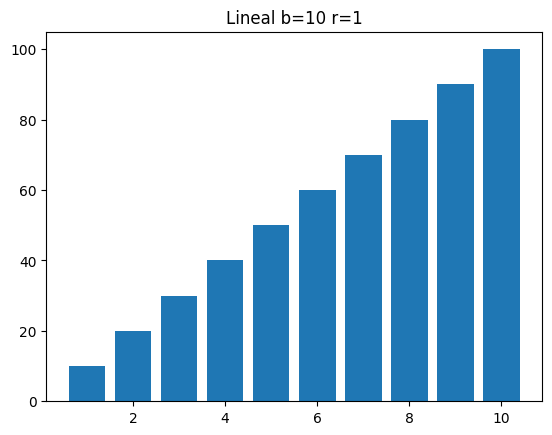

In [ ]:
import matplotlib.pyplot as plt

poblacion_lineal = modelo_lineal()

plt.bar(range(1, meses+1), poblacion_lineal)
plt.title("Lineal b=10 r=1")
plt.show()

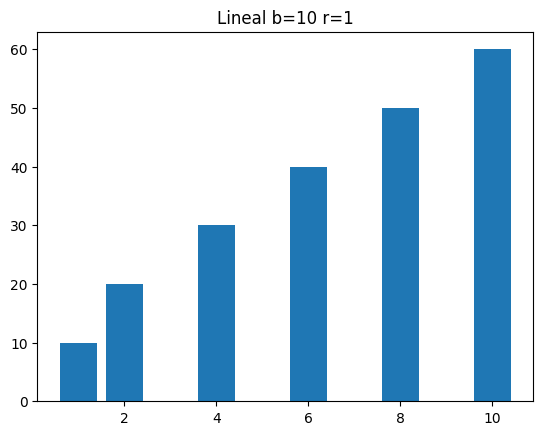

In [ ]:
import matplotlib.pyplot as plt

poblacion_lineal_2 = modelo_lineal_2_meses()

plt.bar([1] + list(range(2, meses+1, 2)), poblacion_lineal_2)
plt.title("Lineal b=10 r=1")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

poblacion_exponencial = modelo_exponencial()

plt.bar(range(1, meses+1), poblacion_exponencial)
plt.title("Lineal b=10 r=1")
plt.show()

En biología los modelos de crecimiento de población se suelen modelar con modelos logísticos. La ecuación diferencial de este  tipo de modelo es:

\begin{equation}
\dot{x}= rx(1-\frac{x}{k})
\end{equation}

Los modelos del ejercicio anterior la tasa de crecimiento siempre crecía o se mantenía. Esto puede ser cierto para una población con recursos ilimitados. Pero cuando ya no hay recursos suficientes se espera que la población decrezca más de lo que crece por lo que la tasa de creimiento deberá caer hasta estabilizarse en un punto en el que la población tenga el número de individuos óptimo para los recursos que hay. En el modelo logístico esto se regula con la k. Vamos a resolver por Euler la ecuación:

\begin{equation}
x_{i+1} = x_{i} + \delta rx_i(1-\frac{x_{i}}{k}) 
\end{equation}

Simplifiquemos con la cosntante $s=\delta r$. Modele este sistema para 100 iteraciones. Partiendo de 0 con k=10 y s=0.08.

In [ ]:
def paso(x_0, s, k):
  return x_0 + s*x_0*(1-x_0/k)

x = [2]

for i in range("""Paso 1""", """Paso Final"""):
  x.append(paso(x[-1], 0.08, 10))

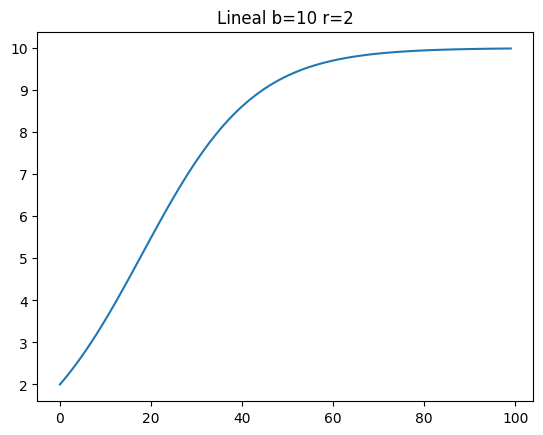

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(0,100+1), x)
plt.title("Lineal b=10 r=2")
plt.show()

EXTRA: Prueba a comenzar con una población inicial superior a la que puede soportar el habitat donde vive la población:

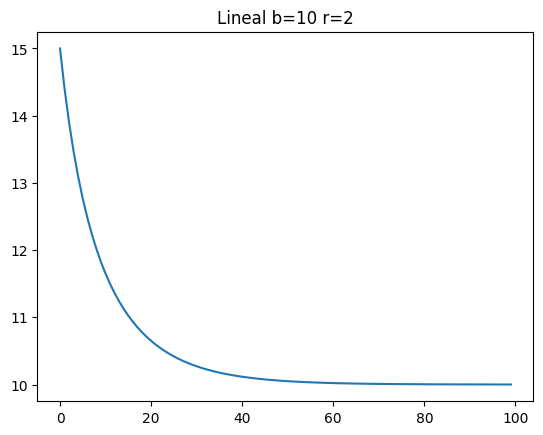

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(0,100+1), x)
plt.title("Lineal b=10 r=2")
plt.show()

**Ejercicio 2:** **Modelo logístico con depredadores**



Añadamos un depredador a nuestra población. Imaginemos que nuestra población son gusanos y el depredador serán pájaros. Como vimos en el anterior ejercicio ya existe un decrecimiento en la población cuando esta sobrepasa ciertos límites. Ahora añadamos un depredador que hará que la población descienda más. Nuestra función quedará:

\begin{equation}
\dot{x}= rx(1-\frac{x}{k}) - P(x)
\end{equation}

Donde P(x) simula a nuestro depredador (los pájaros). La pregunta entonces es cómo se comportan los depredadores. Aparentemente la función de depredadores se parece a:

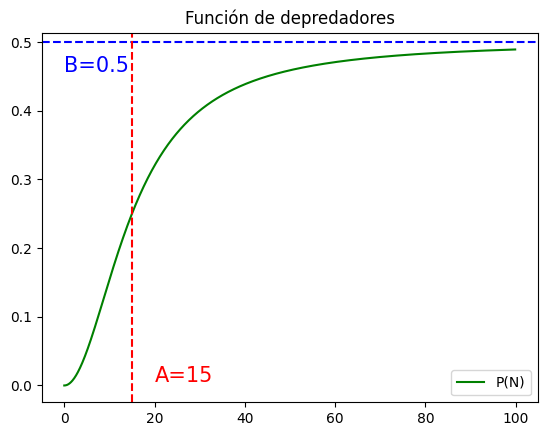

Es decir, al principio, los pájaros no comen mucho. Esto es porque la población de gusanos no es suficiente como para que los pájaros se percaten de que existen. Cuando llegan a un cierto umbral (A) los pájaros empezarán a verles y según haya más gusanos más se comerán. Hata llegar a un límite (B) donde se saciarán y no necesitarán comer más gusanos. Esto se modela con la función:

\begin{equation}
p(N) = \frac{BN^2}{A^2+N^2}
\end{equation}

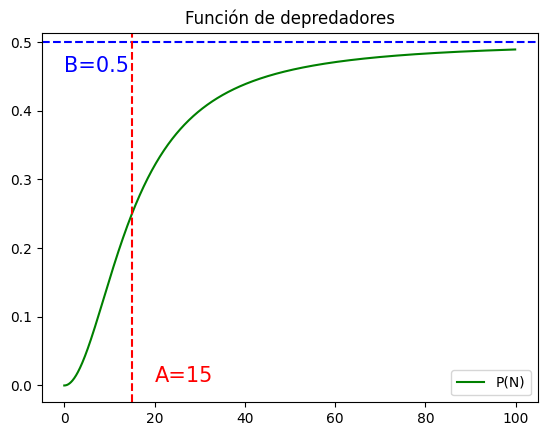

In [ ]:
import numpy as np

A = 15
B = 0.5
f = lambda x:  (x**2*B)/(A**2 + x**2)

e = np.arange(0,100, 0.1)

plt.plot(e,f(e), color="green", label="P(N)")
plt.axhline(B, color='blue', linestyle="--")
plt.axvline(A, color='red', linestyle="--")

text = plt.text(-0, 0.48, "B="+str(B),
                verticalalignment='top', horizontalalignment='left',
                color='blue', fontsize=15)

text = plt.text(20, 0., "A="+str(A),
                verticalalignment='bottom', horizontalalignment='left',
                color='red', fontsize=15)

plt.legend()
plt.title("Función de depredadores")
plt.show()

Predice los 100 primeros pasos a través del método de euler de la población de gusanos, con esta fórmula:

\begin{equation}
x_{i+1} = x_{i} + \delta \left[rx_i\left(1-\frac{x_{i}}{k}\right) + \frac{BN^2}{A^2+N^2}\right] 
\end{equation}

Con las constantes: $\delta=0.01$, $r=10$, $k=10$, $A=0$ y prueba varios números en el rango de $[0-10]$ para $B$


In [ ]:
def paso(x_0, s, r, k, A, B):
  return x_0 + s* (r*x_0*(1-(x_0/k)) - (x_0**2*B)/(A**2 + x_0**2))

x = [2]

for i in range(1,100+1):
  x.append(paso(x[-1], s=0.01, r=10, k=10, A=0, B=10)) 

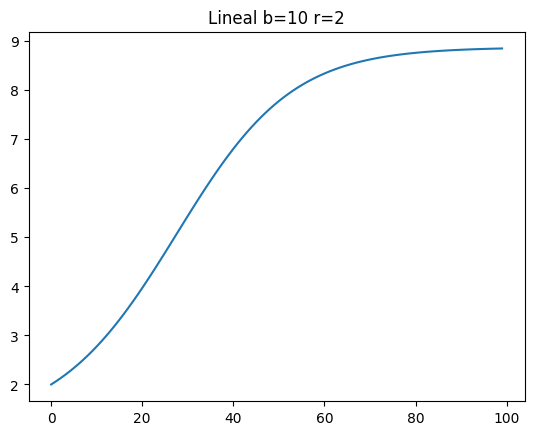

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(0,100+1), x)
plt.title("Lineal b=10 r=2")
plt.show()